In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc,f1_score
from sklearn.metrics import auc,classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import time
#import pydotplus
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
#df=pd.read_csv('/kaggle/input/yourcabs/YourCabs_training.csv')
df=pd.read_csv('YourCabs_training.csv')

In [6]:
df

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,41602.82020,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,41604.08037,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,185939,48729,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,41602.97917,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,41602.69495,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [5]:
df.shape

(43431, 19)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

### Converting date columns to datetime datatype

In [166]:
df['from_date']=pd.to_datetime(df['to_date'])
df['to_date']=pd.to_datetime(df['to_date'])
df['booking_created']=pd.to_datetime(df['booking_created'])

### extracting date,month,year datetime columns

In [167]:
df['from_date_year']=df['from_date'].dt.year
df['from_date_month']=df['from_date'].dt.month
df['from_date_day']=df['from_date'].dt.day
df['to_date_year']=df['to_date'].dt.year
df['to_date_month']=df['to_date'].dt.month
df['to_date_day']=df['to_date'].dt.day
df['booking_created_year']=df['booking_created'].dt.year
df['booking_created_month']=df['booking_created'].dt.month
df['booking_created_day']=df['booking_created'].dt.day
df['booking_created_hour']=df['booking_created'].dt.hour
df['booking_created_min']=df['booking_created'].dt.minute

In [168]:
pd.options.display.max_columns=100
df

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_date_year,from_date_month,from_date_day,to_date_year,to_date_month,to_date_day,booking_created_year,booking_created_month,booking_created_day,booking_created_hour,booking_created_min
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,NaT,NaT,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,1,1,39
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,NaT,NaT,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,1,2,25
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,NaT,NaT,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,1,3,8
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,NaT,NaT,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,1,4,39
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,NaT,NaT,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,1,7,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,1970-01-01 00:00:00.000041602,1970-01-01 00:00:00.000041602,1,0,2013-11-24 14:25:00,13.030640,77.649100,12.952780,77.590880,0,1970.0,1.0,1.0,1970.0,1.0,1.0,2013,11,24,14,25
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,1970-01-01 00:00:00.000041604,1970-01-01 00:00:00.000041604,1,0,2013-11-24 14:30:00,13.199560,77.706880,13.017436,77.644580,0,1970.0,1.0,1.0,1970.0,1.0,1.0,2013,11,24,14,30
43428,185939,48729,12,1.0,3,974.0,NaN,15.0,NaN,1970-01-01 00:00:00.000041602,1970-01-01 00:00:00.000041602,0,0,2013-11-24 14:35:00,13.075570,77.559040,NaN,NaN,0,1970.0,1.0,1.0,1970.0,1.0,1.0,2013,11,24,14,35
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,1970-01-01 00:00:00.000041602,1970-01-01 00:00:00.000041602,0,0,2013-11-24 14:43:00,12.968970,77.594560,12.938230,77.622890,0,1970.0,1.0,1.0,1970.0,1.0,1.0,2013,11,24,14,43


In [14]:
cols=df.columns

for i in cols:
    print(f'Number of Unique values for {i} ',df[i].nunique())

print()

for i in cols:
    print(f'Unique values for {i} ',df[i].value_counts())

Number of Unique values for id  43431
Number of Unique values for user_id  22267
Number of Unique values for vehicle_model_id  27
Number of Unique values for package_id  7
Number of Unique values for travel_type_id  3
Number of Unique values for from_area_id  598
Number of Unique values for to_area_id  568
Number of Unique values for from_city_id  3
Number of Unique values for to_city_id  116
Number of Unique values for from_date  20377
Number of Unique values for to_date  22151
Number of Unique values for online_booking  2
Number of Unique values for mobile_site_booking  2
Number of Unique values for booking_created  39349
Number of Unique values for from_lat  466
Number of Unique values for from_long  462
Number of Unique values for to_lat  450
Number of Unique values for to_long  447
Number of Unique values for Car_Cancellation  2

Unique values for id  132512    1
168178    1
168168    1
168169    1
168170    1
         ..
150298    1
150299    1
150300    1
150301    1
185941    1

In [169]:
df.isnull().sum()

id                           0
user_id                      0
vehicle_model_id             0
package_id               35881
travel_type_id               0
from_area_id                88
to_area_id                9138
from_city_id             27086
to_city_id               41843
from_date                17890
to_date                  17890
online_booking               0
mobile_site_booking          0
booking_created              0
from_lat                    93
from_long                   93
to_lat                    9138
to_long                   9138
Car_Cancellation             0
from_date_year           17890
from_date_month          17890
from_date_day            17890
to_date_year             17890
to_date_month            17890
to_date_day              17890
booking_created_year         0
booking_created_month        0
booking_created_day          0
booking_created_hour         0
booking_created_min          0
dtype: int64

### Calculating the distance using latitude and longitude

In [170]:
from haversine import haversine , Unit
from geopy.distance import geodesic
# def calculate_distance(row):
#     coords_1 = (row['from_lat'], row['from_long'])
#     coords_2 = (row['to_lat'], row['to_long'])
#     return geodesic(coords_1, coords_2).km

# df['distance'] = df.apply(calculate_distance, axis=1)

distance=[]
for i in range(len(df['from_lat'])):
    dist=(haversine((df['from_lat'].iloc[i],df['from_long'].iloc[i]),(df['to_lat'].iloc[i],df['to_long'].iloc[i])))
    distance.append(dist)


In [171]:
df['Distance']=pd.DataFrame(distance)

In [172]:
df.isnull().sum()/df.shape[0]*100

id                        0.000000
user_id                   0.000000
vehicle_model_id          0.000000
package_id               82.616104
travel_type_id            0.000000
from_area_id              0.202620
to_area_id               21.040271
from_city_id             62.365591
to_city_id               96.343626
from_date                41.191775
to_date                  41.191775
online_booking            0.000000
mobile_site_booking       0.000000
booking_created           0.000000
from_lat                  0.214133
from_long                 0.214133
to_lat                   21.040271
to_long                  21.040271
Car_Cancellation          0.000000
from_date_year           41.191775
from_date_month          41.191775
from_date_day            41.191775
to_date_year             41.191775
to_date_month            41.191775
to_date_day              41.191775
booking_created_year      0.000000
booking_created_month     0.000000
booking_created_day       0.000000
booking_created_hour

In [173]:
df_copy=df.copy()

## EDA

### Univarient analysis

<AxesSubplot:xlabel='package_id', ylabel='count'>

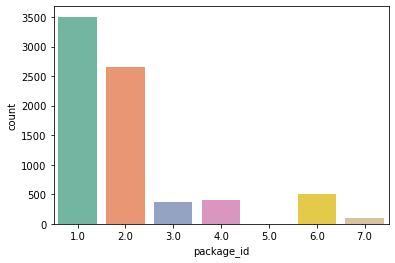

In [21]:
sns.countplot(data=df,x='package_id',palette='Set2')

<AxesSubplot:xlabel='travel_type_id', ylabel='count'>

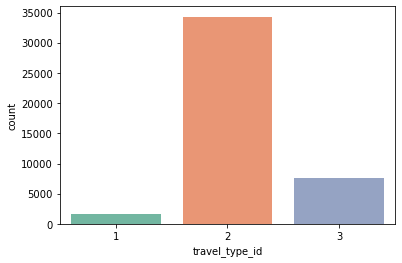

In [24]:
sns.countplot(data=df,x='travel_type_id',palette='Set2')

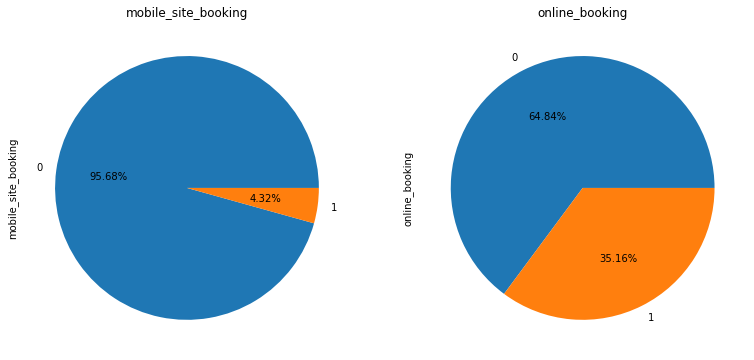

In [41]:
cols=['mobile_site_booking','online_booking']
fig, ax = plt.subplots(nrows = 1,ncols =2,figsize = (13,12))
for i in range(len(cols)):
    plt.subplot(1,2,i+1)
    col_value=df[cols[i]].value_counts()
    col_value.plot(kind='pie',autopct='%.2f%%')
    plt.title(cols[i])

### Bivarient Analysis

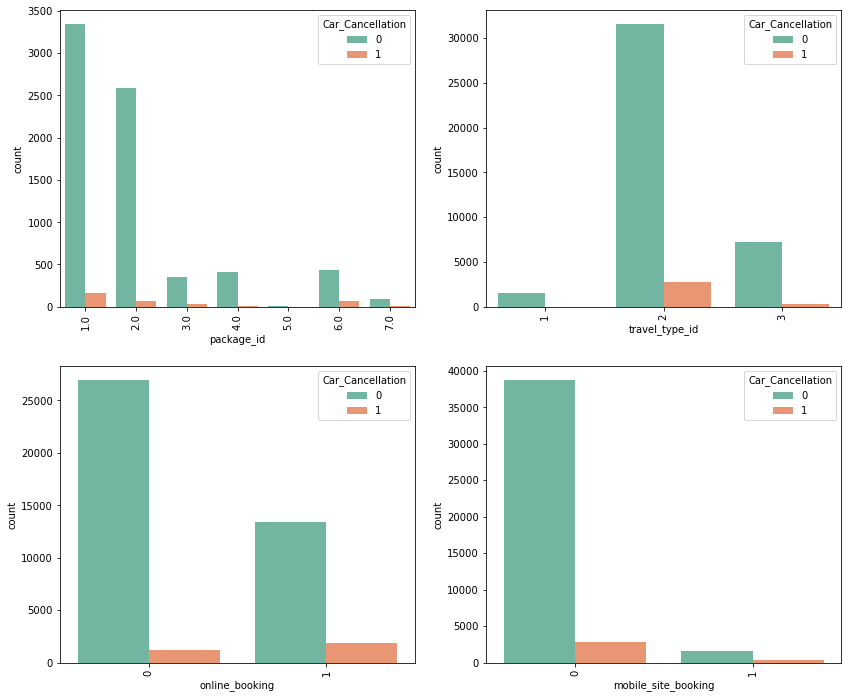

In [64]:
# cols = ['package_id','travel_type_id', 'online_booking', 'mobile_site_booking']

# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
# for i in range(len(cols)):
#     plt.subplot(2, 2, i+1)
#     sns.barplot(data=df, x=cols[i], y=df['Car_Cancellation'], palette='Set2')
#     plt.xticks(rotation=90)

cols=['package_id','travel_type_id', 'online_booking', 'mobile_site_booking']

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(14,12))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.countplot(data=df,x=cols[i],hue='Car_Cancellation',palette='Set2')
    plt.xticks(rotation=90)



### Observations
- The visuals show the impact of features on canccellation of bookings
- As most of the cancellation is baised towards one value the plots indicate a higher number for car_cancellation = 0


### Multivarient Analysis

<AxesSubplot:>

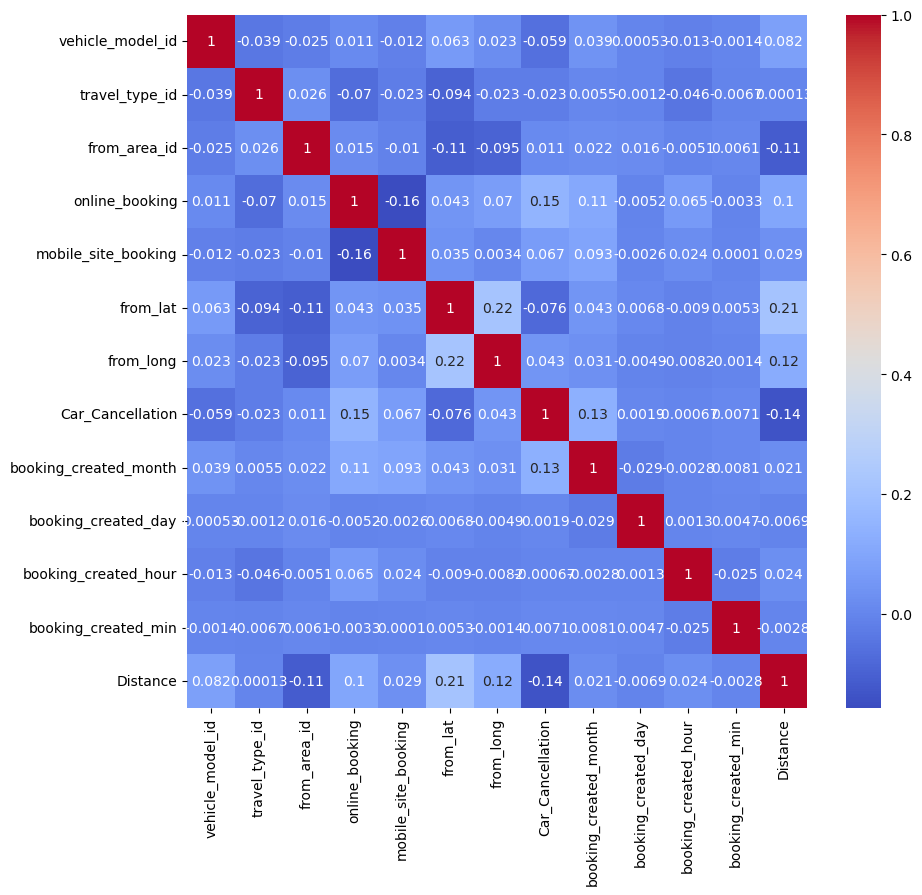

In [181]:
plt.figure(figsize=(10,9))
sns.heatmap(df_copy.corr(),annot=True,cmap='coolwarm')

In [174]:
df_copy.drop(['package_id','to_area_id','from_city_id','to_city_id','to_date','to_lat','to_long','to_date_year','to_date_month','to_date_day','from_date','from_date_year','from_date_month','from_date_day','booking_created_year'],axis=1,inplace=True)

In [175]:
df_copy.drop(['id','user_id'],axis=1,inplace=True)

In [176]:
df_copy.isnull().sum()

vehicle_model_id            0
travel_type_id              0
from_area_id               88
online_booking              0
mobile_site_booking         0
booking_created             0
from_lat                   93
from_long                  93
Car_Cancellation            0
booking_created_month       0
booking_created_day         0
booking_created_hour        0
booking_created_min         0
Distance                 9138
dtype: int64

In [177]:
df_copy['from_area_id'].fillna(df_copy['from_area_id'].median(),inplace=True)
df_copy['from_lat'].fillna(df_copy['from_lat'].median(),inplace=True)
df_copy['from_long'].fillna(df_copy['from_long'].median(),inplace=True)

In [178]:
df_copy['Distance'].fillna(df_copy['Distance'].mean(),inplace=True)

In [179]:
colms=df_copy.columns
out_col=[]
for c in colms:
    q1=df_copy[c].quantile(.25)
    q3=df_copy[c].quantile(.75)
    iqr=q3-q1
    
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    
    ul_outlier_count=df_copy[df_copy[c]>ul].shape[0]
    ll_outlier_count=df_copy[df_copy[c]<ll].shape[0]
    if((ul_outlier_count>0.0) | (ll_outlier_count<0.0)):
        out_col.append(c)
print(out_col)

        

['vehicle_model_id', 'travel_type_id', 'mobile_site_booking', 'from_lat', 'Car_Cancellation', 'Distance']


In [180]:
for c in out_col:
    df_copy.loc[df_copy[c]>ul,c]=ul
    df_copy.loc[df_copy[c]<ll,c]=ll

In [182]:
df_copy.drop(['booking_created'],axis=1,inplace=True)

In [183]:
ss=StandardScaler()
mm=MinMaxScaler()

df_copy.drop('Car_Cancellation',axis=1,inplace=True)
df_copy_std=ss.fit_transform(df_copy)
df_copy_mm=mm.fit_transform(df_copy)

### Spliting the target and feature columns

In [184]:
X=df.drop(['Car_Cancellation'],axis=1)
Y=df['Car_Cancellation']
Y

0        0
1        0
2        0
3        0
4        0
        ..
43426    0
43427    0
43428    0
43429    0
43430    0
Name: Car_Cancellation, Length: 43431, dtype: int64

### spliting the training and testing data

In [185]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.3,random_state=42)

### Data Cleaning

### Missing value treatment

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='from_area_id', ylabel='Density'>

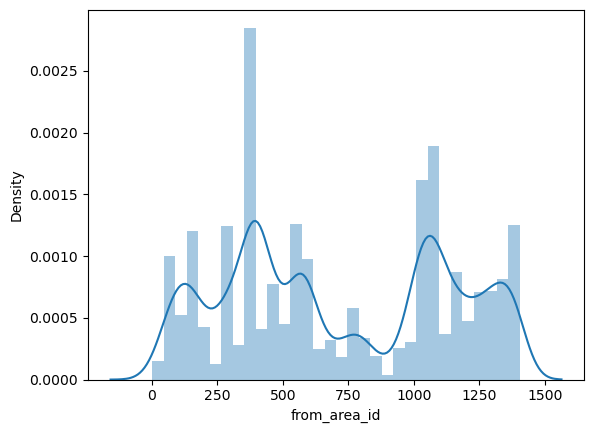

In [186]:
sns.distplot(x_train['from_area_id'],kde=True)

In [187]:
#sns.histplot(x_train['from_area_id'],kde=True)

In [188]:
x_train.isnull().sum()

id                           0
user_id                      0
vehicle_model_id             0
package_id               25118
travel_type_id               0
from_area_id                61
to_area_id                6399
from_city_id             18956
to_city_id               29285
from_date                12480
to_date                  12480
online_booking               0
mobile_site_booking          0
booking_created              0
from_lat                    64
from_long                   64
to_lat                    6399
to_long                   6399
from_date_year           12480
from_date_month          12480
from_date_day            12480
to_date_year             12480
to_date_month            12480
to_date_day              12480
booking_created_year         0
booking_created_month        0
booking_created_day          0
booking_created_hour         0
booking_created_min          0
Distance                  6399
dtype: int64

In [189]:
(x_train.isnull().sum()/x_train.shape[0])*100

id                        0.000000
user_id                   0.000000
vehicle_model_id          0.000000
package_id               82.622282
travel_type_id            0.000000
from_area_id              0.200651
to_area_id               21.048650
from_city_id             62.353212
to_city_id               96.329068
from_date                41.051281
to_date                  41.051281
online_booking            0.000000
mobile_site_booking       0.000000
booking_created           0.000000
from_lat                  0.210519
from_long                 0.210519
to_lat                   21.048650
to_long                  21.048650
from_date_year           41.051281
from_date_month          41.051281
from_date_day            41.051281
to_date_year             41.051281
to_date_month            41.051281
to_date_day              41.051281
booking_created_year      0.000000
booking_created_month     0.000000
booking_created_day       0.000000
booking_created_hour      0.000000
booking_created_min 

### Droping the columns which have missing value percentage >10



In [190]:
x_train.drop(['package_id','to_area_id','from_city_id','to_city_id','to_date','to_lat','to_long','to_date_year','to_date_month','to_date_day','from_date','from_date_year','from_date_month','from_date_day','booking_created_year'],axis=1,inplace=True)

### HERE ID AND USER ID DO NOT ADD ANY VALUE TO THE DATA HENCE ARE DROPPED



In [191]:
x_train.drop(['id','user_id'],axis=1,inplace=True)

In [192]:
(x_train.isnull().sum()/x_train.shape[0])*100

vehicle_model_id          0.000000
travel_type_id            0.000000
from_area_id              0.200651
online_booking            0.000000
mobile_site_booking       0.000000
booking_created           0.000000
from_lat                  0.210519
from_long                 0.210519
booking_created_month     0.000000
booking_created_day       0.000000
booking_created_hour      0.000000
booking_created_min       0.000000
Distance                 21.048650
dtype: float64

In [193]:
pd.options.display.max_columns=100

### FILLING THE MISSING DATA 

In [194]:
x_train['from_area_id'].fillna(x_train['from_area_id'].median(),inplace=True)
x_train['from_lat'].fillna(x_train['from_lat'].median(),inplace=True)
x_train['from_long'].fillna(x_train['from_long'].median(),inplace=True)

x_train['Distance'].fillna(x_train['Distance'].mean(),inplace=True)

In [195]:
(x_train.isnull().sum()/x_train.shape[0])*100

vehicle_model_id         0.0
travel_type_id           0.0
from_area_id             0.0
online_booking           0.0
mobile_site_booking      0.0
booking_created          0.0
from_lat                 0.0
from_long                0.0
booking_created_month    0.0
booking_created_day      0.0
booking_created_hour     0.0
booking_created_min      0.0
Distance                 0.0
dtype: float64

In [196]:
############################## TREATING THE TESTING VALUES

(x_test.isnull().sum()/x_test.shape[0])*100

id                        0.000000
user_id                   0.000000
vehicle_model_id          0.000000
package_id               82.601688
travel_type_id            0.000000
from_area_id              0.207214
to_area_id               21.020721
from_city_id             62.394474
to_city_id               96.377590
from_date                41.519570
to_date                  41.519570
online_booking            0.000000
mobile_site_booking       0.000000
booking_created           0.000000
from_lat                  0.222563
from_long                 0.222563
to_lat                   21.020721
to_long                  21.020721
from_date_year           41.519570
from_date_month          41.519570
from_date_day            41.519570
to_date_year             41.519570
to_date_month            41.519570
to_date_day              41.519570
booking_created_year      0.000000
booking_created_month     0.000000
booking_created_day       0.000000
booking_created_hour      0.000000
booking_created_min 

In [197]:
x_test.drop(['package_id','to_area_id','from_city_id','to_city_id','to_date','to_lat','to_long','to_date_year','to_date_month','to_date_day','from_date','from_date_year','from_date_month','from_date_day','booking_created_year'],axis=1,inplace=True)

In [198]:
x_test.drop(['id','user_id'],axis=1,inplace=True)

In [199]:
(x_test.isnull().sum()/x_test.shape[0])*100

vehicle_model_id          0.000000
travel_type_id            0.000000
from_area_id              0.207214
online_booking            0.000000
mobile_site_booking       0.000000
booking_created           0.000000
from_lat                  0.222563
from_long                 0.222563
booking_created_month     0.000000
booking_created_day       0.000000
booking_created_hour      0.000000
booking_created_min       0.000000
Distance                 21.020721
dtype: float64

In [200]:
x_test['from_area_id'].fillna(x_test['from_area_id'].median(),inplace=True)
x_test['from_lat'].fillna(x_test['from_lat'].median(),inplace=True)
x_test['from_long'].fillna(x_test['from_long'].median(),inplace=True)

x_test['Distance'].fillna(x_test['Distance'].mean(),inplace=True)

In [201]:
(x_test.isnull().sum()/x_test.shape[0])*100

vehicle_model_id         0.0
travel_type_id           0.0
from_area_id             0.0
online_booking           0.0
mobile_site_booking      0.0
booking_created          0.0
from_lat                 0.0
from_long                0.0
booking_created_month    0.0
booking_created_day      0.0
booking_created_hour     0.0
booking_created_min      0.0
Distance                 0.0
dtype: float64

### OUTLIER TREATMENT

In [202]:
cols=x_train.columns
cols

Index(['vehicle_model_id', 'travel_type_id', 'from_area_id', 'online_booking',
       'mobile_site_booking', 'booking_created', 'from_lat', 'from_long',
       'booking_created_month', 'booking_created_day', 'booking_created_hour',
       'booking_created_min', 'Distance'],
      dtype='object')

In [203]:
x_train

,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,booking_created,from_lat,from_long,booking_created_month,booking_created_day,booking_created_hour,booking_created_min,Distance
10152,12,2,667.0,0,0,2013-04-16 13:15:00,12.971650,77.513160,4,16,13,15,7.299948
40995,24,2,393.0,1,0,2013-11-03 13:30:00,13.199560,77.706880,11,3,13,30,25.089690
1610,12,2,271.0,1,0,2013-01-19 11:04:00,12.956410,77.640760,1,19,11,4,27.969470
222,12,2,1166.0,0,0,2013-01-04 10:16:00,12.997198,77.669514,1,4,10,16,6.464613
25695,12,1,142.0,1,0,2013-08-01 19:19:00,12.912810,77.609230,8,1,19,19,17.458878
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,12,2,1010.0,0,1,2013-03-06 08:53:00,12.966910,77.749350,3,6,8,53,19.172715
11284,12,2,571.0,0,1,2013-04-26 22:31:00,12.951850,77.696420,4,26,22,31,18.369545
38158,12,2,156.0,1,0,2013-10-16 20:45:00,13.026220,77.701430,10,16,20,45,17.887873
860,12,2,571.0,0,0,2013-01-11 17:13:00,12.951850,77.696420,1,11,17,13,13.565933


#### Ploting the box plot to visulaise the outliers

<AxesSubplot:>

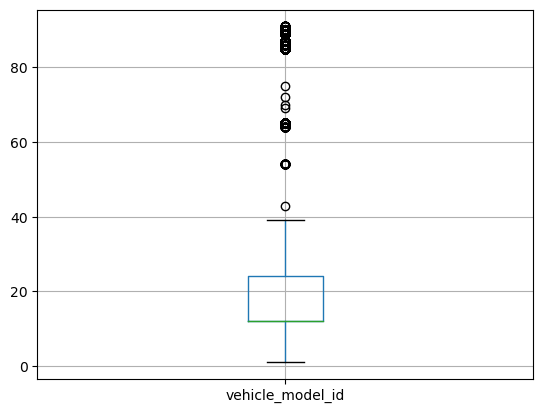

In [204]:
x_train.boxplot('vehicle_model_id')

<AxesSubplot:>

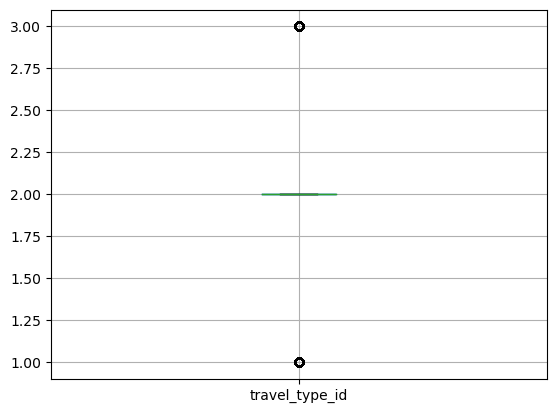

In [205]:
x_train.boxplot('travel_type_id')

<AxesSubplot:>

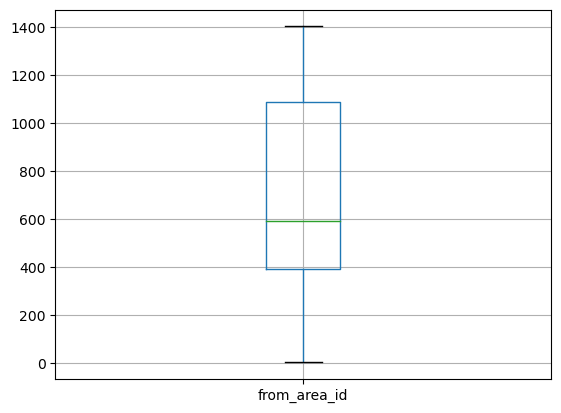

In [206]:
x_train.boxplot('from_area_id')

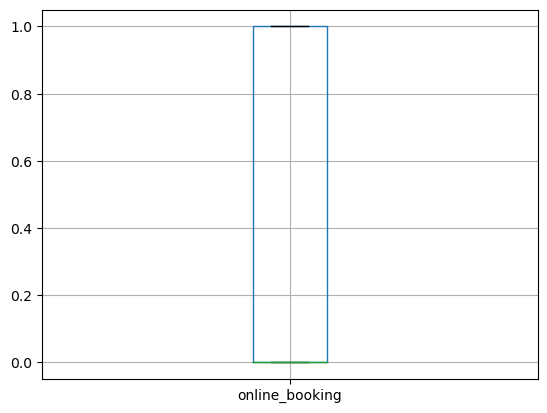

In [207]:
x_train.boxplot('online_booking')
plt.show()

<AxesSubplot:>

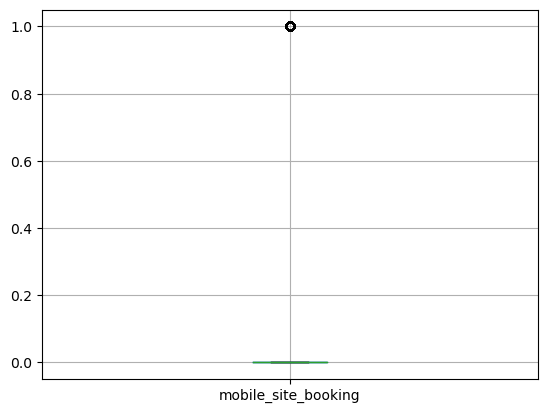

In [208]:
x_train.boxplot('mobile_site_booking')


<AxesSubplot:>

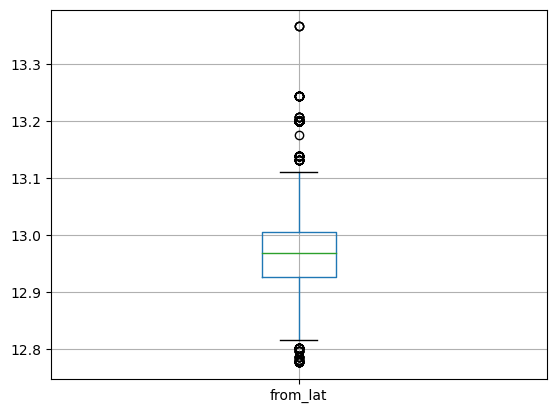

In [209]:
x_train.boxplot('from_lat')

<AxesSubplot:>

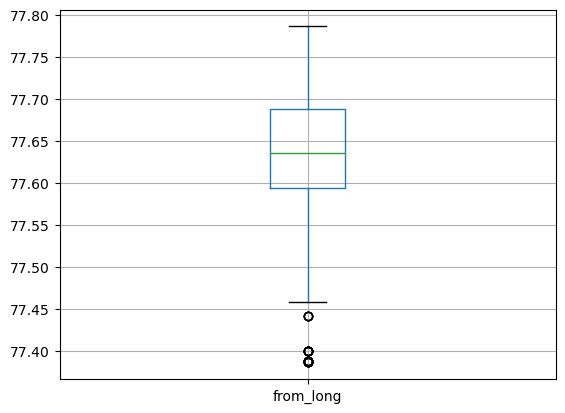

In [210]:
x_train.boxplot('from_long')

<AxesSubplot:>

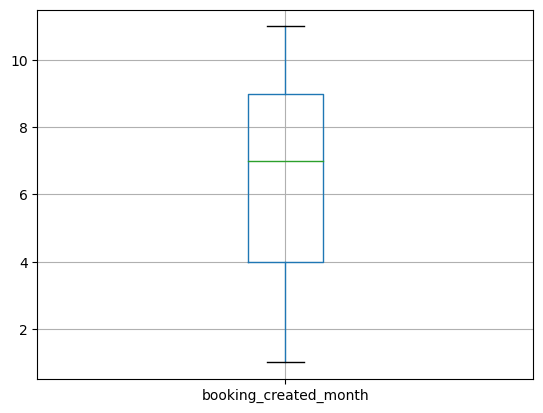

In [211]:
x_train.boxplot('booking_created_month')

<AxesSubplot:>

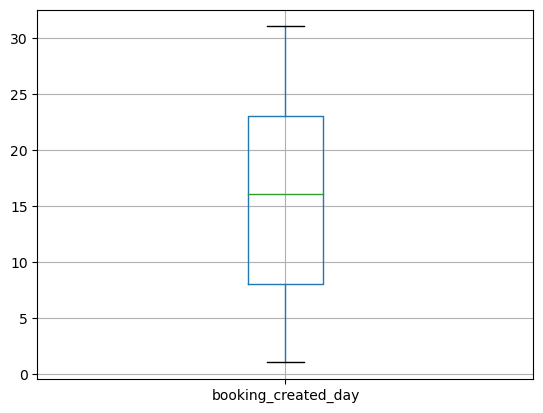

In [212]:
x_train.boxplot('booking_created_day')

<AxesSubplot:>

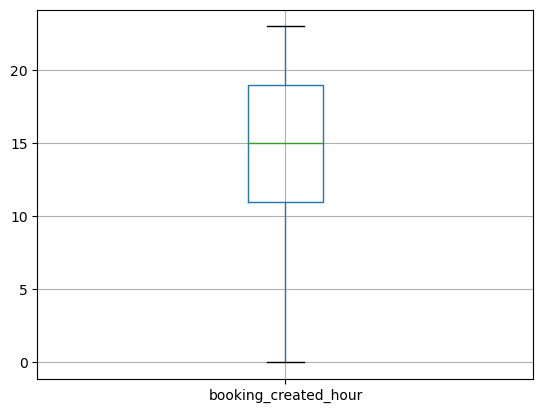

In [213]:
x_train.boxplot('booking_created_hour')

<AxesSubplot:>

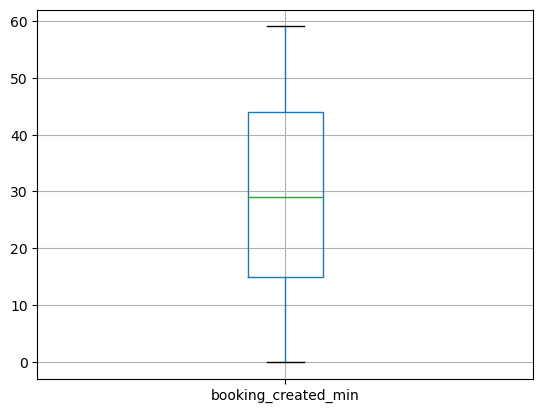

In [214]:
x_train.boxplot('booking_created_min')

<AxesSubplot:>

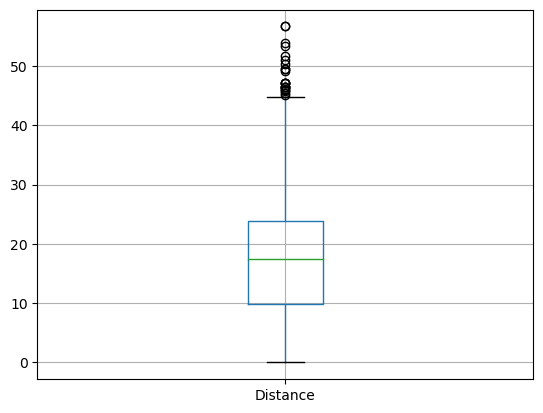

In [215]:
x_train.boxplot('Distance')

### CALCULATING THE OUTLIER PERCENTAGES AND IMPUTING THE OUTLIERS

In [216]:
colmns=x_train.columns

def find_outliers(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    LL = q1 - (1.5 * IQR)
    UL = q3 + (1.5 * IQR)
    #outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    ul_count=x_train[data>UL].shape[0]
    ll_count=x_train[data<LL].shape[0]
    outlier_count = ul_count + ll_count
    outlier_perc=(outlier_count/len(x_train))*100
    return outlier_perc

def find_limits(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    LL = q1 - (1.5 * IQR)
    UL = q3 + (1.5 * IQR)
    return [LL,UL]

In [217]:
outlier_list=[]
res=0
for col in colmns:
    val=x_train[col]
    res=find_outliers(val)
    outlier_list.append([col,res])
print(outlier_list)

[['vehicle_model_id', 18.104667609618105], ['travel_type_id', 21.048649715469885], ['from_area_id', 0.0], ['online_booking', 0.0], ['mobile_site_booking', 4.180783526857669], ['booking_created', 0.0], ['from_lat', 9.331929870727937], ['from_long', 0.08552350251636459], ['booking_created_month', 0.0], ['booking_created_day', 0.0], ['booking_created_hour', 0.0], ['booking_created_min', 0.0], ['Distance', 0.07565540607216868]]


### the columns which are categorical are not taken as treating outliers dose not make sense

In [218]:
# Outliers percentage distribution
# removing columns having zero outliers

for i in outlier_list:
    if i[1]==0.0:
        outlier_list.remove(i)
        
# for percentt>10
for i in outlier_list:
    if i[1]>10:
        print(i)

print()

# for percentage between 5-10
for i in outlier_list:
    if i[1]>=5 and i[1]<=10:
        print(i)

print()

# for percentage <5
for i in outlier_list:
    if i[1]<5:
        print(i)

['vehicle_model_id', 18.104667609618105]
['travel_type_id', 21.048649715469885]

['from_lat', 9.331929870727937]

['online_booking', 0.0]
['mobile_site_booking', 4.180783526857669]
['from_long', 0.08552350251636459]
['booking_created_day', 0.0]
['booking_created_min', 0.0]
['Distance', 0.07565540607216868]


In [219]:
# OUTLIER IMPUTING FOR %<5 AND % BETWEEN 5 AND 10
temp_outliers=[]
for i in outlier_list:
    if i[0] in ['from_long','from_lat','Distance']:
        temp_outliers.append(i)


for i in temp_outliers:
    if i[1]>0.0 and i[1]<=10.0:
        limits=find_limits(x_train[i[0]])
        x_train[i[0]]=x_train[i[0]].apply(lambda x: limits[1] if x > limits[1] else x)
        x_train[i[0]]=x_train[i[0]].apply(lambda x: limits[0] if x < limits[0] else x)

In [220]:
outlier_list=[]
res=0
for col in colmns:
    val=x_train[col]
    res=find_outliers(val)
    outlier_list.append([col,res])
print(outlier_list)

[['vehicle_model_id', 18.104667609618105], ['travel_type_id', 21.048649715469885], ['from_area_id', 0.0], ['online_booking', 0.0], ['mobile_site_booking', 4.180783526857669], ['booking_created', 0.0], ['from_lat', 0.0], ['from_long', 0.0], ['booking_created_month', 0.0], ['booking_created_day', 0.0], ['booking_created_hour', 0.0], ['booking_created_min', 0.0], ['Distance', 0.0]]


#### OUTLIER TREATMENT FOR TESTING DATA

In [221]:

colmns=x_train.columns

def find_outliers(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    LL = q1 - (1.5 * IQR)
    UL = q3 + (1.5 * IQR)
    #outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    ul_count=x_test[data>UL].shape[0]
    ll_count=x_test[data<LL].shape[0]
    outlier_count = ul_count + ll_count
    outlier_perc=(outlier_count/len(x_test))*100
    return outlier_perc

def find_limits(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    LL = q1 - (1.5 * IQR)
    UL = q3 + (1.5 * IQR)
    return [LL,UL]

In [222]:
outlier_list=[]
res=0
for col in colmns:
    val=x_test[col]
    res=find_outliers(val)
    outlier_list.append([col,res])
print(outlier_list)

[['vehicle_model_id', 18.3960092095165], ['travel_type_id', 21.028396009209516], ['from_area_id', 0.0], ['online_booking', 0.0], ['mobile_site_booking', 4.658480429777437], ['booking_created', 0.0], ['from_lat', 9.40905602455871], ['from_long', 0.12279355333844973], ['booking_created_month', 0.0], ['booking_created_day', 0.0], ['booking_created_hour', 0.0], ['booking_created_min', 0.0], ['Distance', 0.09976976208749042]]


### the columns which are categorical are not taken as treating outliers dose not make sense

In [223]:
# Outliers percentage distribution
# removing columns having zero outliers

for i in outlier_list:
    if i[1]==0.0:
        outlier_list.remove(i)
        
# for percentt>10
for i in outlier_list:
    if i[1]>10:
        print(i)

print()

# for percentage between 5-10
for i in outlier_list:
    if i[1]>=5 and i[1]<=10:
        print(i)

print()

# for percentage <5
for i in outlier_list:
    if i[1]<5:
        print(i)

['vehicle_model_id', 18.3960092095165]
['travel_type_id', 21.028396009209516]

['from_lat', 9.40905602455871]

['online_booking', 0.0]
['mobile_site_booking', 4.658480429777437]
['from_long', 0.12279355333844973]
['booking_created_day', 0.0]
['booking_created_min', 0.0]
['Distance', 0.09976976208749042]


In [224]:
# OUTLIER IMPUTING FOR %<5 AND % BETWEEN 5 AND 10
temp_outliers=[]
for i in outlier_list:
    if i[0] in ['from_long','from_lat','Distance']:
        temp_outliers.append(i)


for i in temp_outliers:
    if i[1]>0.0 and i[1]<=10.0:
        limits=find_limits(x_test[i[0]])
        x_test[i[0]]=x_test[i[0]].apply(lambda x: limits[1] if x > limits[1] else x)
        x_test[i[0]]=x_test[i[0]].apply(lambda x: limits[0] if x < limits[0] else x)

In [225]:
outlier_list=[]
res=0
for col in colmns:
    val=x_test[col]
    res=find_outliers(val)
    outlier_list.append([col,res])
print(outlier_list)

[['vehicle_model_id', 18.3960092095165], ['travel_type_id', 21.028396009209516], ['from_area_id', 0.0], ['online_booking', 0.0], ['mobile_site_booking', 4.658480429777437], ['booking_created', 0.0], ['from_lat', 0.0], ['from_long', 0.0], ['booking_created_month', 0.0], ['booking_created_day', 0.0], ['booking_created_hour', 0.0], ['booking_created_min', 0.0], ['Distance', 0.0]]


### Correlation analysis

<AxesSubplot:>

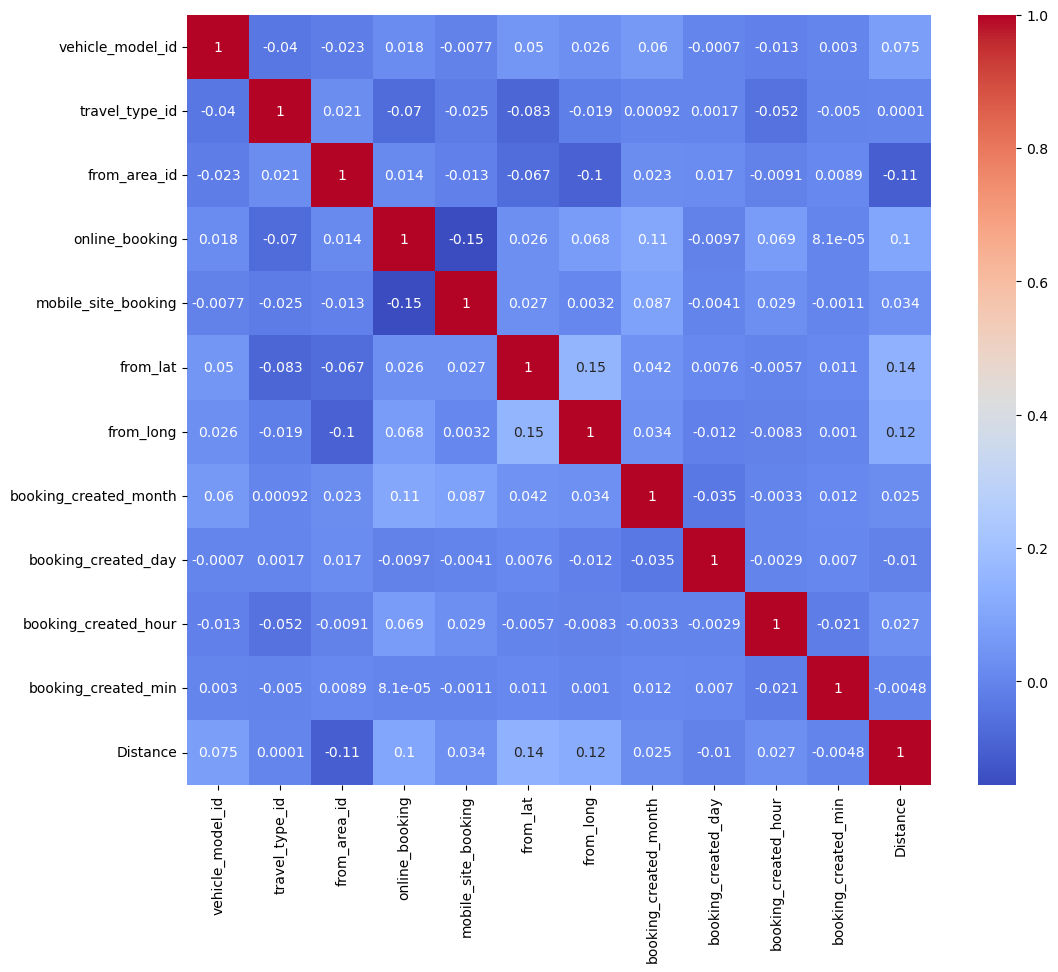

In [226]:
plt.figure(figsize=(12,10))
sns.heatmap(x_train.corr(method='pearson'),annot=True,cmap='coolwarm')

### USING VIF METHOD

In [227]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
x=x_train[x_train.columns]
x.drop(['booking_created'],axis=1,inplace=True)
vif_cal=pd.DataFrame()

vif_cal["feature"] = x.columns
vif_cal["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_cal)


                  feature           VIF
0        vehicle_model_id      1.943497
1          travel_type_id     25.251872
2            from_area_id      3.950964
3          online_booking      1.648560
4     mobile_site_booking      1.087748
5                from_lat  36462.874770
6               from_long  36556.989834
7   booking_created_month      6.049149
8     booking_created_day      4.108978
9    booking_created_hour      8.247313
10    booking_created_min      3.917430
11               Distance      4.738149


#### CORRELATION ANALYSIS FOR TESTING DATA

<AxesSubplot:>

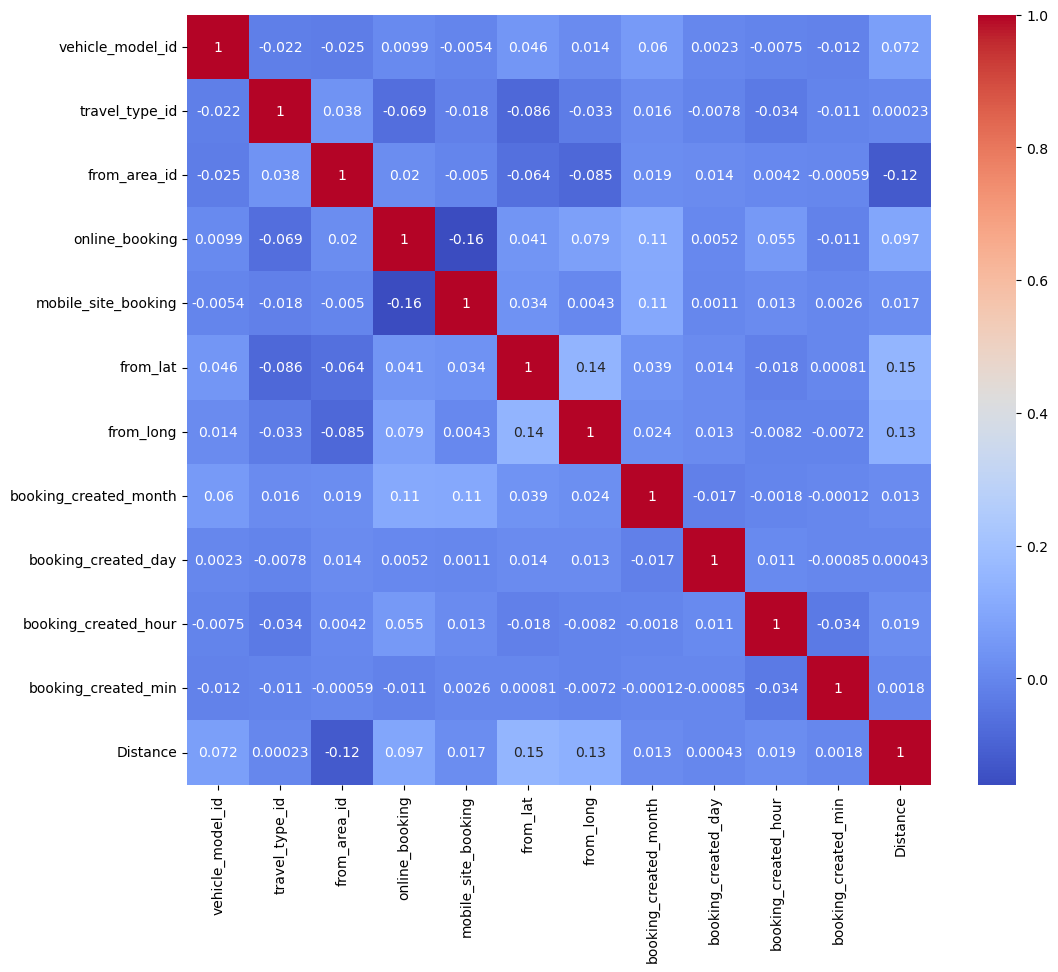

In [228]:
plt.figure(figsize=(12,10))
sns.heatmap(x_test.corr(method='pearson'),annot=True,cmap='coolwarm')

### DATA SCALING

#### STANDARD SCALAR

In [229]:
x_train.drop(['booking_created'],axis=1,inplace=True)

In [230]:
ss=StandardScaler()

x_train_scalar=ss.fit_transform(x_train)
#x_train_scalar=pd.DataFrame(x_train_scalar)

In [231]:
x_train_scalar

array([[-5.10440547e-01, -3.13058732e-01, -1.10314380e-01, ...,
        -2.57113109e-01, -8.35997257e-01, -1.09263246e+00],
       [-6.20866192e-02, -3.13058732e-01, -7.63416032e-01, ...,
        -2.57113109e-01,  3.50429335e-02,  8.21284322e-01],
       [-5.10440547e-01, -3.13058732e-01, -1.05421312e+00, ...,
        -6.29424696e-01, -1.47476006e+00,  1.13110667e+00],
       ...,
       [-5.10440547e-01, -3.13058732e-01, -1.32832513e+00, ...,
         1.04597745e+00,  9.06083124e-01,  4.64738765e-02],
       [-5.10440547e-01, -3.13058732e-01, -3.39138316e-01, ...,
         4.87510066e-01, -9.52135949e-01, -4.18503874e-01],
       [ 2.21704585e+00,  1.97091019e+00, -4.72618946e-01, ...,
        -2.57113109e-01, -3.71442489e-01,  3.20236506e-04]])

In [232]:
x_test.drop('booking_created',axis=1,inplace=True)

In [233]:
## SCALING THE TESTING DATA

x_test_scaler=ss.transform(x_test)
#x_test_scaler=pd.DataFrame(x_test_scaler)

#### MINMAX SCALER

In [234]:
mm=MinMaxScaler()

x_train_mm=mm.fit_transform(x_train)
#x_train_mm=pd.DataFrame(x_train_mm)

x_test_mm=mm.transform(x_test)
#x_test_mm=pd.DataFrame(x_test_mm)

#### CHECKING DISTRIBUTION OF Y/ TARGET

In [235]:
(Y.value_counts()/Y.shape[0])*100

0    92.788561
1     7.211439
Name: Car_Cancellation, dtype: float64

In [236]:
print(y_train.value_counts()/y_train.shape[0]*100)
print(y_test.value_counts()/y_train.shape[0]*100)

0    92.756817
1     7.243183
Name: Car_Cancellation, dtype: float64
0    39.801322
1     3.059110
Name: Car_Cancellation, dtype: float64


MODELS TO BE IMPLEMENTED
1- LOGESESTIC REGRESSION
2- DECISION TREE
3- RANDOM FOREST
4- ADABOOST
5- XGBOOST
6- NAVIE BAYES CLASSIFICATION
7- KNN
8- SVM

### LOGESTIC REGRESSION

In [237]:
models_res=[]

start=time.time()
from sklearn.linear_model import LogisticRegression

def logistic_regression(xtrain,xtest):
    log_reg=LogisticRegression()
    log_reg.fit(xtrain,y_train)
    y_predict=log_reg.predict(xtest)
    y_predictproba=log_reg.predict_proba(xtest)[::,1]
    return [y_predict,y_predictproba]

y=logistic_regression(x_train_scalar,x_test_scaler)

def logistic_metrices(ytest,ypredict):
    con_matrix=confusion_matrix(ytest,ypredict)
    accur=metrics.accuracy_score(ytest,ypredict)
    classf_report=metrics.classification_report(ytest,ypredict)
    f1_scr=metrics.f1_score(ytest,ypredict)
    return [con_matrix,accur,classf_report,f1_scr]


In [238]:
metr=logistic_metrices(y_test,y[0])
end=time.time()

In [239]:
tpr,fpr,_=metrics.roc_curve(y_test,y[1])
auc=metrics.roc_auc_score(y_test,y[1]) 

#### MODEL EVALUATION USING STANDARD SCALAR

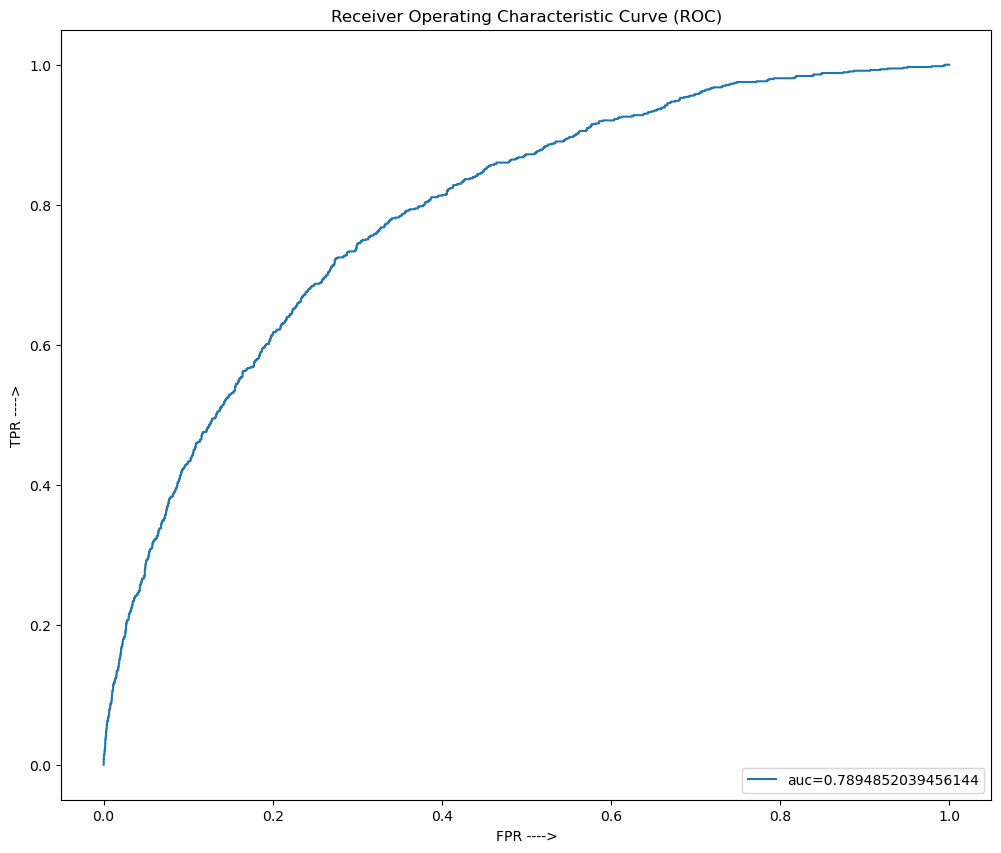

In [240]:
plt.figure(figsize=(12,10))
plt.plot(tpr,fpr,label='auc='+str(auc))
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.legend(loc=4)
plt.show()

In [241]:
print(f'accuracy= ',{metr[1]},'\n')
print(f'confusion_matrix= ',metr[0],'\n')
print(f'classification report= \n',metr[2])
print(f'f1 score = ',metr[3])
time_taken=end-start

models_res.append(['Logestic regression',metr[1],auc,metr[3],time_taken])

accuracy=  {0.9290099769762088} 

confusion_matrix=  [[12092     8]
 [  917    13]] 

classification report= 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     12100
           1       0.62      0.01      0.03       930

    accuracy                           0.93     13030
   macro avg       0.77      0.51      0.50     13030
weighted avg       0.91      0.93      0.90     13030

f1 score =  0.027339642481598314


#### MODEL EVALUATION USING MINMAX SCALAR

In [242]:
y_mm=logistic_regression(x_train_mm,x_test_mm)

In [243]:
metr_mm=logistic_metrices(y_test,y_mm[0])

In [244]:
tpr,fpr,_=metrics.roc_curve(y_test,y_mm[1])
auc=metrics.roc_auc_score(y_test,y_mm[1])

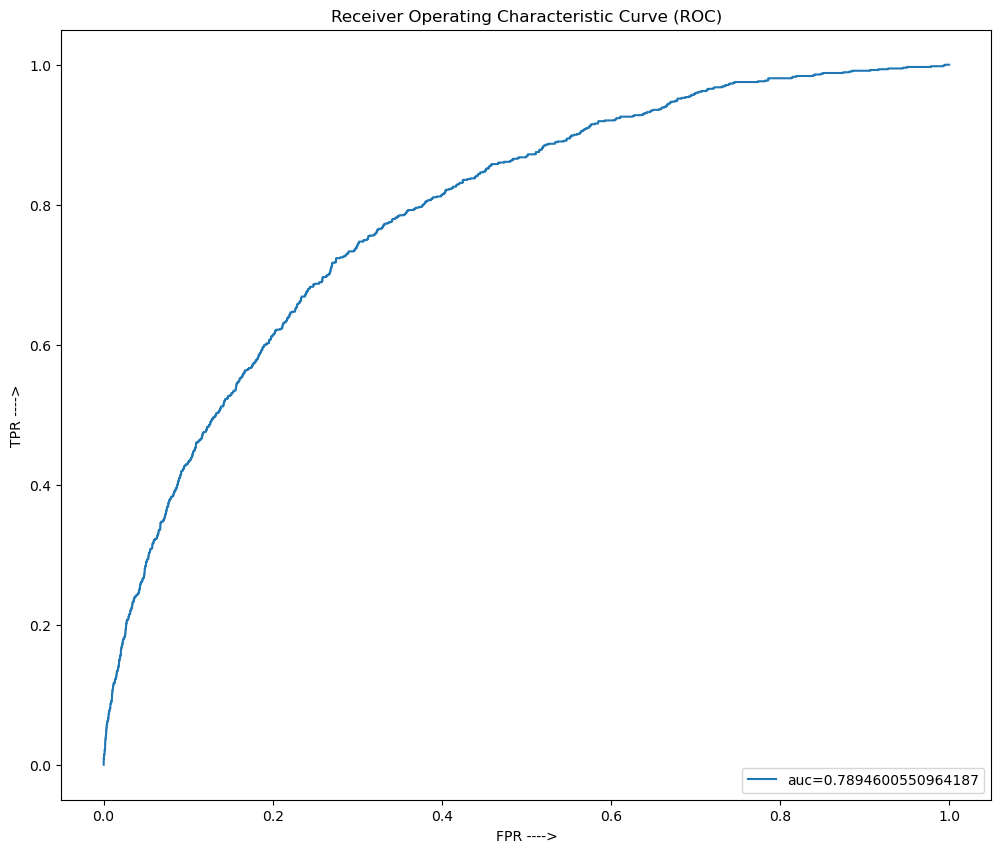

In [245]:
plt.figure(figsize=(12,10))
plt.plot(tpr,fpr,label='auc='+str(auc))
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.legend(loc=4)
plt.show()

In [246]:
print(f'accuracy= ',{metr_mm[1]},'\n')
print(f'confusion_matrix= \n',metr_mm[0],'\n')
print(f'classification report= \n',metr_mm[2])


accuracy=  {0.9290867229470453} 

confusion_matrix= 
 [[12093     7]
 [  917    13]] 

classification report= 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     12100
           1       0.65      0.01      0.03       930

    accuracy                           0.93     13030
   macro avg       0.79      0.51      0.50     13030
weighted avg       0.91      0.93      0.90     13030



## DECISION TREE

In [247]:
hyperparameters={'max_depth':[2,4,6,8,10],'min_samples_split':np.arange(3,11),'min_samples_leaf':np.arange(3,11),'max_leaf_nodes':np.arange(5,21)}

def max_depth(xinput_train,xinput_test):
    results=[]
    for i in ['gini','entropy']:
        for j in [2,4,6,8,10,11,12,13,14,15,16,17,18,19,20]:
            result=[]
            model_dt = DecisionTreeClassifier(random_state=1,criterion=i,max_depth=j)
            model_dt.fit(xinput_train,y_train)
            y_train_predict=model_dt.predict(xinput_train)
            y_test_predict=model_dt.predict(xinput_test)
            model_dt_score_train = model_dt.score(xinput_train,y_train)
            model_dt_score_test = model_dt.score(xinput_test,y_test)
            model_dt_f1_train=f1_score(y_train,y_train_predict)
            model_dt_f1_test=f1_score(y_test,y_test_predict)
            #result[i]={'Trining Score':model_dt_score_train,'Test Score':model_dt_score_test,'Train f1':model_dt_f1_train,'Test f1':model_dt_f1_test}
            result.extend([i,j,model_dt_score_train,model_dt_score_test,model_dt_f1_train,model_dt_f1_test])
            results.append(result)
    depth_df=pd.DataFrame(results,columns=['Criterion','depth','Train accuracy','Test accuracy','F1 train','F1 test'])
    depth_df.sort_values(by=['Test accuracy','F1 test','Train accuracy','F1 train'],ascending=[False,False,False,False],na_position='last')
    return depth_df

res_scalar=max_depth(x_train_scalar,x_test_scaler)
res_scalar

,Criterion,depth,Train accuracy,Test accuracy,F1 train,F1 test
0,gini,2,0.927568,0.928626,0.000000,0.000000
1,gini,4,0.927568,0.928626,0.000000,0.000000
2,gini,6,0.930956,0.928856,0.234221,0.200173
3,gini,8,0.936713,0.926170,0.374105,0.266768
4,gini,10,0.946581,0.922563,0.500308,0.286926
5,gini,11,0.952370,0.921566,0.566727,0.284314
6,gini,12,0.959278,0.913661,0.661933,0.325135
7,gini,13,0.964902,0.908212,0.713711,0.320455
8,gini,14,0.970889,0.902609,0.777806,0.325359
9,gini,15,0.976481,0.898388,0.820035,0.308977


In [248]:
res_minmax=max_depth(x_train_mm,x_test_mm)
res_scalar

,Criterion,depth,Train accuracy,Test accuracy,F1 train,F1 test
0,gini,2,0.927568,0.928626,0.000000,0.000000
1,gini,4,0.927568,0.928626,0.000000,0.000000
2,gini,6,0.930956,0.928856,0.234221,0.200173
3,gini,8,0.936713,0.926170,0.374105,0.266768
4,gini,10,0.946581,0.922563,0.500308,0.286926
5,gini,11,0.952370,0.921566,0.566727,0.284314
6,gini,12,0.959278,0.913661,0.661933,0.325135
7,gini,13,0.964902,0.908212,0.713711,0.320455
8,gini,14,0.970889,0.902609,0.777806,0.325359
9,gini,15,0.976481,0.898388,0.820035,0.308977


#### GINI IS BETTER THAN ENTROPY AND REMAINS SAME FOR STANDARD AND MINMAX SCALAR

In [249]:
hyperparameters={'max_depth':[2,4,6,8,10],'min_samples_split':np.arange(3,11),'min_samples_leaf':np.arange(3,11),'max_leaf_nodes':np.arange(5,21)}

def minsamples_split(xinput_train,xinput_test):
    results=[]
    for i in ['gini','entropy']:
        for j in np.arange(3,11):
            result=[]
            model_dt = DecisionTreeClassifier(random_state=1,criterion=i,max_depth=13,min_samples_split=j)
            model_dt.fit(xinput_train,y_train)
            y_train_predict=model_dt.predict(xinput_train)
            y_test_predict=model_dt.predict(xinput_test)
            model_dt_score_train = model_dt.score(xinput_train,y_train)
            model_dt_score_test = model_dt.score(xinput_test,y_test)
            model_dt_f1_train=f1_score(y_train,y_train_predict)
            model_dt_f1_test=f1_score(y_test,y_test_predict)
            #result[i]={'Trining Score':model_dt_score_train,'Test Score':model_dt_score_test,'Train f1':model_dt_f1_train,'Test f1':model_dt_f1_test}
            result.extend([i,j,model_dt_score_train,model_dt_score_test,model_dt_f1_train,model_dt_f1_test])
            results.append(result)
    depth_df=pd.DataFrame(results,columns=['Criterion','min sample split','Train accuracy','Test accuracy','F1 train','F1 test'])
    depth_df.sort_values(by=['Test accuracy','F1 test','Train accuracy','F1 train'],ascending=[False,False,False,False],na_position='last')
    return depth_df

res_scalar=minsamples_split(x_train_scalar,x_test_scaler)
res_scalar

,Criterion,min sample split,Train accuracy,Test accuracy,F1 train,F1 test
0,gini,3,0.964047,0.909823,0.701448,0.318841
1,gini,4,0.961514,0.909900,0.682927,0.318235
2,gini,5,0.960330,0.910207,0.671390,0.318182
3,gini,6,0.959475,0.910744,0.659669,0.312241
4,gini,7,0.957567,0.913354,0.643449,0.324357
5,gini,8,0.956350,0.911358,0.633121,0.319387
6,gini,9,0.955495,0.913200,0.626140,0.319904
7,gini,10,0.955067,0.912663,0.618222,0.317746
8,entropy,3,0.960593,0.910054,0.685068,0.317016
9,entropy,4,0.959343,0.909440,0.676270,0.322618


In [250]:
res_minmax=minsamples_split(x_train_mm,x_test_mm)
res_minmax

,Criterion,min sample split,Train accuracy,Test accuracy,F1 train,F1 test
0,gini,3,0.964047,0.910821,0.701448,0.321262
1,gini,4,0.961514,0.910898,0.682927,0.321449
2,gini,5,0.960330,0.911205,0.671390,0.321408
3,gini,6,0.959475,0.911665,0.659669,0.314473
4,gini,7,0.957567,0.914351,0.643449,0.326900
5,gini,8,0.956350,0.912203,0.633121,0.321471
6,gini,9,0.955495,0.914121,0.626140,0.322229
7,gini,10,0.955067,0.913584,0.618222,0.320048
8,entropy,3,0.960593,0.909900,0.685068,0.317442
9,entropy,4,0.959343,0.909593,0.676270,0.324541


#### GINI IS BETTER THAN ENTROPY ,THE STANDARD SCALAR IS SLIGHTLY BETTER FOR GINI AND REMAINS SAME FOR ENTROPY 

In [251]:
hyperparameters={'max_depth':[2,4,6,8,10],'min_samples_split':np.arange(3,11),'min_samples_leaf':np.arange(3,11),'max_leaf_nodes':np.arange(5,21)}

def minsamples_leaf(xinput_train,xinput_test):
    results=[]
    for i in ['gini','entropy']:
        for j in np.arange(3,11):
            result=[]
            model_dt = DecisionTreeClassifier(random_state=1,criterion=i,max_depth=13,min_samples_split=5,min_samples_leaf=j)
            model_dt.fit(xinput_train,y_train)
            y_train_predict=model_dt.predict(xinput_train)
            y_test_predict=model_dt.predict(xinput_test)
            model_dt_score_train = model_dt.score(xinput_train,y_train)
            model_dt_score_test = model_dt.score(xinput_test,y_test)
            model_dt_f1_train=f1_score(y_train,y_train_predict)
            model_dt_f1_test=f1_score(y_test,y_test_predict)
            #result[i]={'Trining Score':model_dt_score_train,'Test Score':model_dt_score_test,'Train f1':model_dt_f1_train,'Test f1':model_dt_f1_test}
            result.extend([i,j,model_dt_score_train,model_dt_score_test,model_dt_f1_train,model_dt_f1_test])
            results.append(result)
    depth_df=pd.DataFrame(results,columns=['Criterion','min samples leaf','Train accuracy','Test accuracy','F1 train','F1 test'])
    depth_df.sort_values(by=['Test accuracy','F1 test','Train accuracy','F1 train'],ascending=[False,False,False,False],na_position='last')
    return depth_df

res_scalar=minsamples_leaf(x_train_scalar,x_test_scaler)
res_scalar

,Criterion,min samples leaf,Train accuracy,Test accuracy,F1 train,F1 test
0,gini,3,0.955298,0.905372,0.634579,0.303783
1,gini,4,0.951087,0.917345,0.578395,0.314449
2,gini,5,0.948850,0.917421,0.568176,0.331677
3,gini,6,0.946778,0.919033,0.541123,0.332701
4,gini,7,0.946022,0.917498,0.527226,0.320051
5,gini,8,0.944574,0.919417,0.507742,0.316406
6,gini,9,0.943094,0.921028,0.493263,0.324360
7,gini,10,0.941712,0.922256,0.471045,0.311353
8,entropy,3,0.953192,0.909133,0.624835,0.313225
9,entropy,4,0.949870,0.916807,0.575251,0.313924


In [252]:
res_minmax=minsamples_leaf(x_train_mm,x_test_mm)
res_minmax

,Criterion,min samples leaf,Train accuracy,Test accuracy,F1 train,F1 test
0,gini,3,0.955298,0.905602,0.634579,0.304299
1,gini,4,0.951087,0.917421,0.578395,0.313776
2,gini,5,0.948850,0.917421,0.568176,0.330846
3,gini,6,0.946778,0.919110,0.541123,0.332911
4,gini,7,0.946022,0.917652,0.527226,0.320456
5,gini,8,0.944574,0.919417,0.507742,0.316406
6,gini,9,0.943094,0.921028,0.493263,0.324360
7,gini,10,0.941712,0.922256,0.471045,0.311353
8,entropy,3,0.953192,0.909056,0.624835,0.313043
9,entropy,4,0.949870,0.916731,0.575251,0.313725


#### Gini is better overall and the Gini and Entropy remained slightly higher for  minmax scaler

In [253]:
hyperparameters={'max_depth':[2,4,6,8,10],'min_samples_split':np.arange(3,11),'min_samples_leaf':np.arange(3,11),'max_leaf_nodes':np.arange(5,21)}

def maxleaf_nodes(xinput_train,xinput_test):
    results=[]
    for i in ['gini','entropy']:
        for j in np.arange(5,21):
            result=[]
            model_dt = DecisionTreeClassifier(random_state=1,criterion=i,max_depth=13,min_samples_split=5,min_samples_leaf=3,max_leaf_nodes=j)
            model_dt.fit(xinput_train,y_train)
            y_train_predict=model_dt.predict(xinput_train)
            y_test_predict=model_dt.predict(xinput_test)
            model_dt_score_train = model_dt.score(xinput_train,y_train)
            model_dt_score_test = model_dt.score(xinput_test,y_test)
            model_dt_f1_train=f1_score(y_train,y_train_predict)
            model_dt_f1_test=f1_score(y_test,y_test_predict)
            #result[i]={'Trining Score':model_dt_score_train,'Test Score':model_dt_score_test,'Train f1':model_dt_f1_train,'Test f1':model_dt_f1_test}
            result.extend([i,j,model_dt_score_train,model_dt_score_test,model_dt_f1_train,model_dt_f1_test])
            results.append(result)
    depth_df=pd.DataFrame(results,columns=['Criterion','max leaf nodes','Train accuracy','Test accuracy','F1 train','F1 test'])
    depth_df.sort_values(by=['Test accuracy','F1 test','Train accuracy','F1 train'],ascending=[False,False,False,False],na_position='last')
    return depth_df

res_scalar=maxleaf_nodes(x_train_scalar,x_test_scaler)
res_scalar

,Criterion,max leaf nodes,Train accuracy,Test accuracy,F1 train,F1 test
0,gini,5,0.927568,0.928626,0.000000,0.000000
1,gini,6,0.927568,0.928626,0.000000,0.000000
2,gini,7,0.927568,0.928626,0.000000,0.000000
3,gini,8,0.927568,0.928626,0.000000,0.000000
4,gini,9,0.927568,0.928626,0.000000,0.000000
5,gini,10,0.927568,0.928626,0.000000,0.000000
6,gini,11,0.927568,0.928626,0.000000,0.000000
7,gini,12,0.927568,0.928626,0.000000,0.000000
8,gini,13,0.927568,0.928626,0.000000,0.000000
9,gini,14,0.927568,0.928626,0.000000,0.000000


In [254]:
res_minmax=maxleaf_nodes(x_train_mm,x_test_mm)
res_minmax

,Criterion,max leaf nodes,Train accuracy,Test accuracy,F1 train,F1 test
0,gini,5,0.927568,0.928626,0.000000,0.000000
1,gini,6,0.927568,0.928626,0.000000,0.000000
2,gini,7,0.927568,0.928626,0.000000,0.000000
3,gini,8,0.927568,0.928626,0.000000,0.000000
4,gini,9,0.927568,0.928626,0.000000,0.000000
5,gini,10,0.927568,0.928626,0.000000,0.000000
6,gini,11,0.927568,0.928626,0.000000,0.000000
7,gini,12,0.927568,0.928626,0.000000,0.000000
8,gini,13,0.927568,0.928626,0.000000,0.000000
9,gini,14,0.927568,0.928626,0.000000,0.000000


#### Gini is better than Entropy and both Standard and minmax remain the same  

#### Based on accuracy and F1 score the following : 
#### critirion = gini
#### max depth=13, min sample split=5,min_samples_split=3,min_samples_leaf=3,max_leaf_nodes=15

In [255]:
start=time.time()
model_dt_final=DecisionTreeClassifier(random_state=1,max_depth=13,min_samples_split=5,min_samples_leaf=3,max_leaf_nodes=15)
model_dt_final.fit(x_train_scalar,y_train)

DecisionTreeClassifier(max_depth=13, max_leaf_nodes=15, min_samples_leaf=3,
                       min_samples_split=5, random_state=1)

In [256]:
y_predict_dt = model_dt_final.predict(x_test_scaler)
y_pred_proba_dt=model_dt_final.predict_proba(x_test_scaler)[::,1]

end=time.time()
time_taken=end-start

In [257]:
con_matrix=confusion_matrix(y_test,y_predict_dt)
print(con_matrix)

[[12097     3]
 [  920    10]]


In [258]:
acc_dt=accuracy_score(y_test,y_predict_dt)

In [259]:
class_report=metrics.classification_report(y_test,y_predict_dt)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12100
           1       0.77      0.01      0.02       930

    accuracy                           0.93     13030
   macro avg       0.85      0.51      0.49     13030
weighted avg       0.92      0.93      0.90     13030



In [260]:
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_proba_dt)
#roc_auc_dt =roc_auc_score(y_test,y_pred_proba_dt)
roc_auc_dt = metrics.auc(fpr_dt,tpr_dt)
roc_auc_dt
f1_score_dt=metrics.f1_score(y_test,y_predict_dt)

models_res.append(['Decision Tree',acc_dt,roc_auc_dt,f1_score_dt,time_taken])

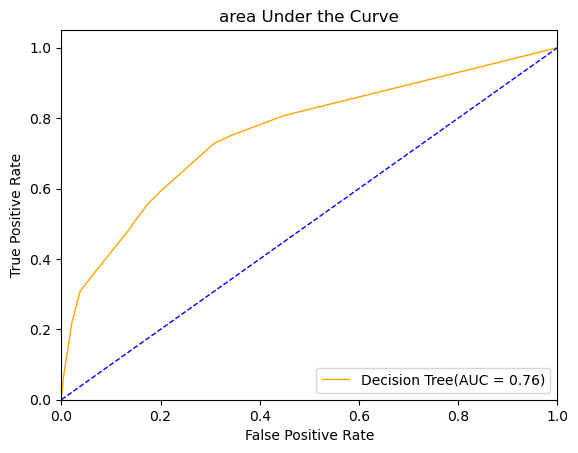

In [261]:
plt.figure(1)
lw=1
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend(loc="lower right")
plt.show()

## RANDOM FOREST

In [262]:
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import KFold,cross_val_score
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

rf=RandomForestClassifier()

### Randomised search cv for hyperparameters optimisation

In [263]:
from sklearn.model_selection import RandomizedSearchCV

start=time.time()

params={
    'max_depth':[4,5,6,7,8,9,10,11,12,13,14],
    'n_estimators':np.arange(50,500,100),
    'max_features':['auto','sqrt','log2',None],
    'criterion':['gini','entropy'],
    'min_samples_leaf':randint(1,4)
}

rnd_search=RandomizedSearchCV(rf,param_distributions=params,n_iter=5,cv=10,n_jobs=3)
rnd_search.fit(x_train_scalar,y_train)
best_parm=rnd_search.best_params_
best_scr=rnd_search.best_score_



In [264]:
print(best_parm)
print(best_scr)

{'criterion': 'gini', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 350}
0.9304628519877463


In [265]:
 rf.set_params(criterion='gini',max_depth=12,n_estimators=150,bootstrap=True,max_features='auto',min_samples_leaf=3)

RandomForestClassifier(max_depth=12, min_samples_leaf=3, n_estimators=150)

[[12076    24]
 [  847    83]]


<AxesSubplot:>

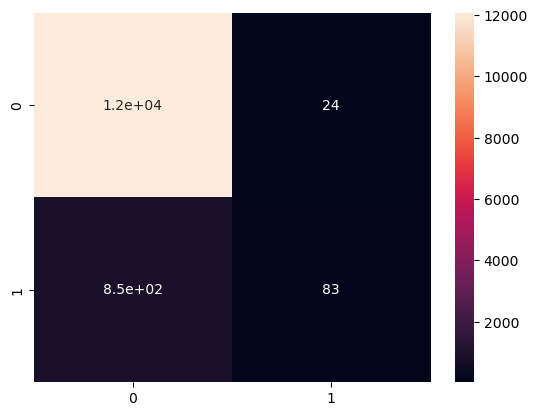

In [266]:
rf.fit(x_train_scalar,y_train)
y_predict_rf=rf.predict(x_test_scaler)
y_pred_proba_rf=rf.predict_proba(x_test_scaler)[::,1]

end=time.time()
time_taken=end-start

confu_mat=confusion_matrix(y_test,y_predict_rf)
print(confu_mat)
sns.heatmap(confu_mat,annot=True)

In [267]:
acc_score_rf=accuracy_score(y_test,y_predict_rf)
acc_score_rf
f1_score_rf=metrics.f1_score(y_test,y_predict_rf)

fpr_rf,tpr_rf,_=roc_curve(y_test,y_predict_rf)
auc_rf=metrics.auc(fpr_rf,tpr_rf)

models_res.append(['Random forest',acc_score_rf,auc_rf,f1_score_rf,time_taken])

## ADABOOST

In [268]:
from sklearn.ensemble import AdaBoostClassifier
import time

adaboost=AdaBoostClassifier()

In [269]:
dtree=DecisionTreeClassifier()
logistic=LogisticRegression()

start=time.time()

param_dist = {'n_estimators':np.arange(50,500,100),
             'learning_rate':[.01,0.05,0.1,.05,1]}

cv_adb=GridSearchCV(adaboost,param_grid=param_dist,n_jobs=3)

cv_adb.fit(x_train,y_train)
print('best parameters=',cv_adb.best_params_)


best parameters= {'learning_rate': 0.1, 'n_estimators': 450}


In [270]:
adaboost.set_params(learning_rate=.1,n_estimators=450,random_state=42,base_estimator=dtree)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=450, random_state=42)

In [271]:
adaboost.fit(x_train_scalar,y_train)
end=time.time()

time_taken=end-start

In [272]:
predict_ada=adaboost.predict(x_test_scaler)
print(predict_ada)

[0 0 0 ... 0 0 0]


In [273]:
#Accuracy

acc_log=accuracy_score(y_test,predict_ada)
print(acc_log)


#ROC,RCO CURVE

pred_proba=adaboost.predict_proba(x_test_scaler)[::,1]

fpr,tpr,_=roc_curve(y_test,pred_proba)
auc_ada=metrics.auc(fpr,tpr)

f1_score_ada=metrics.f1_score(y_test,predict_ada)

0.9331542594013814


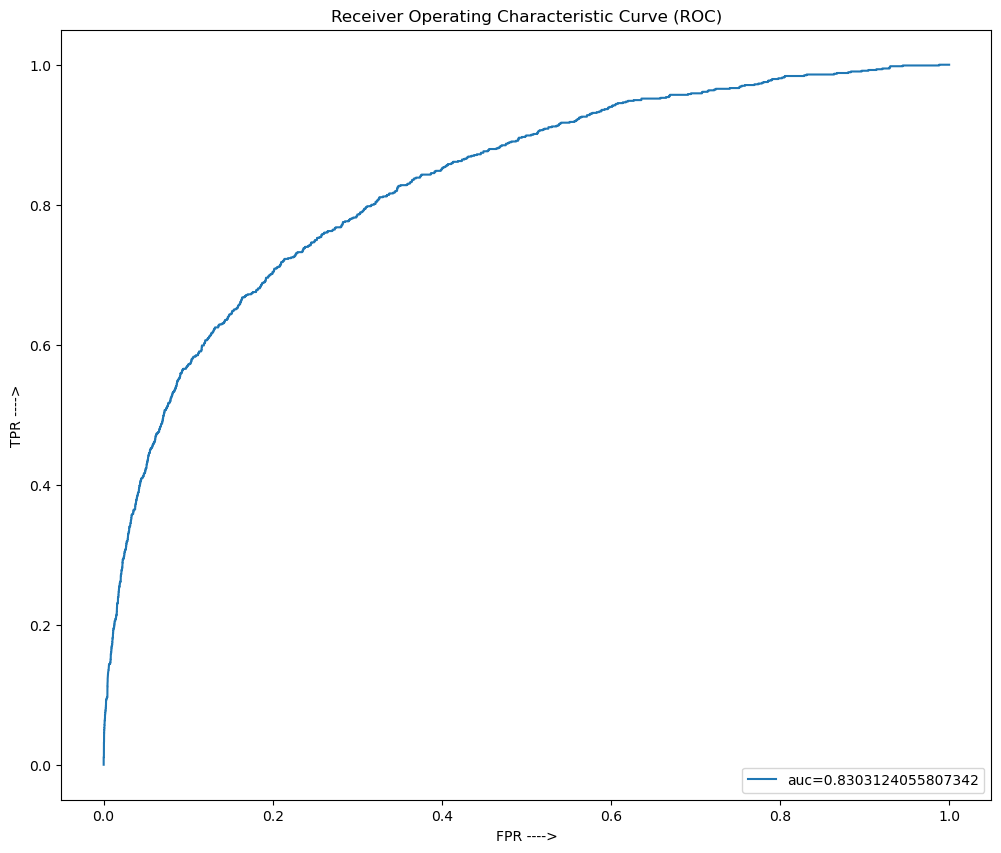

In [274]:
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc_ada))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

models_res.append(['Adaboost with Decision tree',acc_log,auc_ada,f1_score_ada,time_taken])

#### Adaboost with logistic regression as algorithm

In [275]:

adaboost.set_params(learning_rate=.1,n_estimators=450,random_state=42,base_estimator=logistic)

AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.1,
                   n_estimators=450, random_state=42)

In [276]:
adaboost.fit(x_train_scalar,y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.1,
                   n_estimators=450, random_state=42)

In [277]:
predict_ada=adaboost.predict(x_test_scaler)
print(predict_ada)

[0 0 0 ... 0 0 0]


In [278]:
#Accuracy

acc_log=accuracy_score(y_test,predict_ada)
print(acc_log)


#ROC,RCO CURVE

pred_proba=adaboost.predict_proba(x_test_scaler)[::,1]

fpr,tpr,_=roc_curve(y_test,pred_proba)
auc_ada=metrics.auc(fpr,tpr)

f1_score_ada=metrics.f1_score(y_test,predict_ada)

models_res.append(['Adaboost with logestic regression',acc_log,auc_ada,f1_score_ada,time_taken])

0.9291634689178818


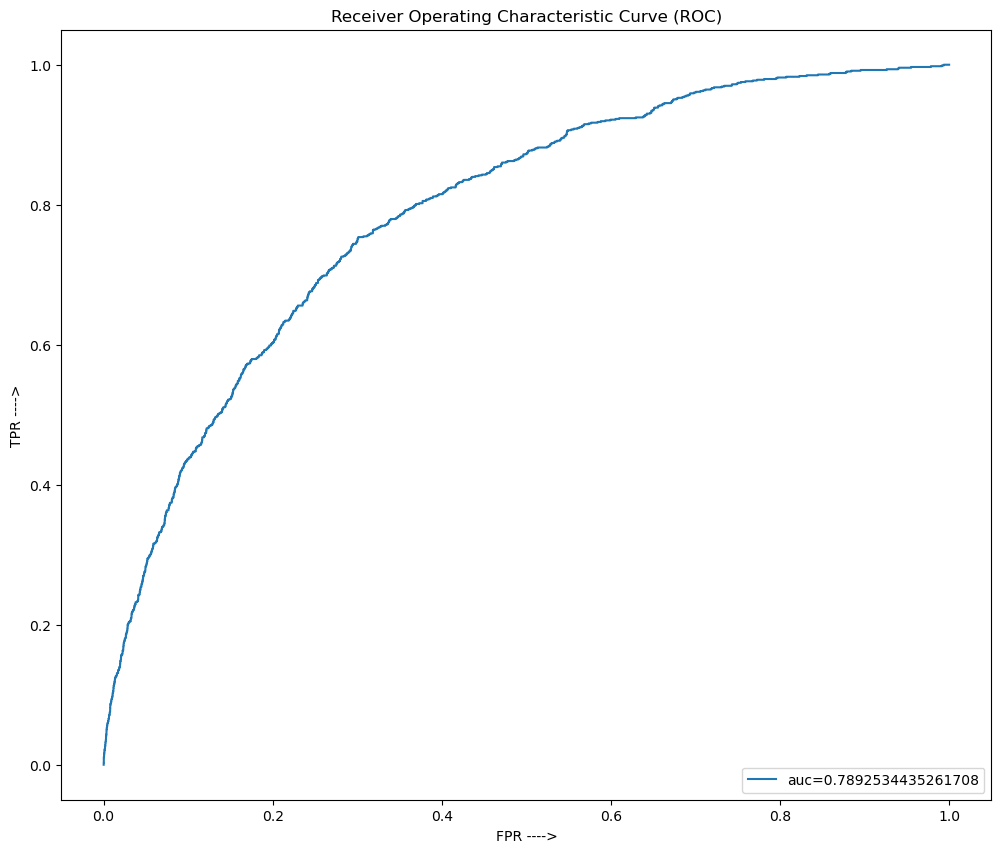

In [279]:
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc_ada))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

#### Comparing results from base estimators as logistic and decision tree, the decision tree performs much better

## SVM

In [280]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [281]:
start =time.time()

svc=SVC(kernel='linear',C=.1)
svc.fit(x_train_scalar,y_train)    
y_pred_svm=svc.predict(x_test_scaler)
acc_svm=accuracy_score(y_test,y_pred_svm)
print(acc_svm)

0.9286262471220261


In [282]:
c_range = list(np.arange(0.1,2,0.1))
acc_avg_score=[]

for c in c_range:
    svc=SVC(kernel='linear',C=c)
    scores=cross_val_score(svc,df_copy_std,Y,cv=10,scoring='accuracy',error_score='raise',)
    acc_avg_score.append(scores.mean())
print(acc_avg_score)


end=time.time()


[0.9278856155562878, 0.9278856155562878, 0.9278856155562878, 0.9278856155562878, 0.9278856155562878, 0.9278856155562878, 0.9278856155562878, 0.9278856155562878, 0.9278856155562878, 0.9278856155562878, 0.9278856155562878, 0.9278856155562878, 0.9278856155562878, 0.9278856155562878, 0.9278856155562878, 0.9278856155562878, 0.9278856155562878, 0.9278856155562878, 0.9278856155562878]


-3355280776.985447

Text(0, 0.5, 'Cross-Validate Accuracy')

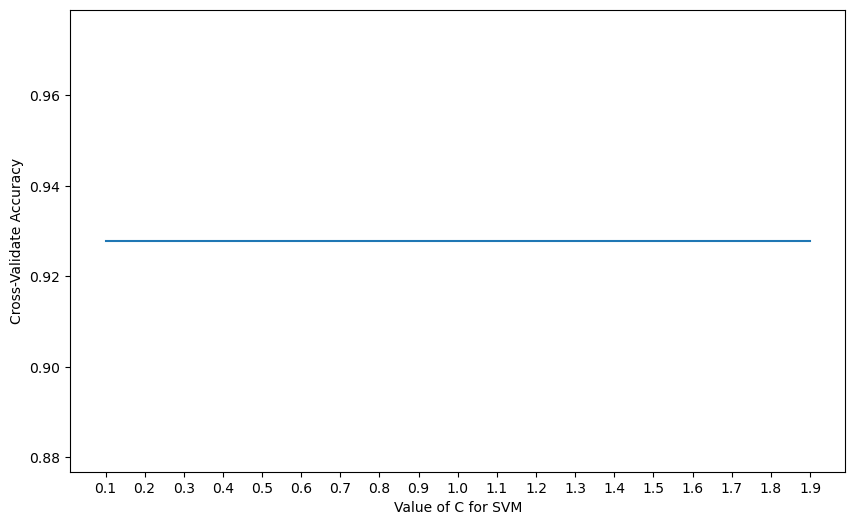

In [283]:
plt.figure(figsize=(10,6))
C_values = list(np.arange(0.1,2,0.1))
# plot C values in X-axis and cross_validate_accuracy on y-axis
plt.plot(C_values,acc_avg_score)
plt.xticks(np.arange(0.1,2,0.1))
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-Validate Accuracy')

In [329]:
con_mat_svm=confusion_matrix(y_test,y_pred_svm)
print(con_mat_svm)
sns.heatmap(con_mat_svm,annot=True)

f1_score_svm=metrics.f1_score(y_test,y_pred_svm)

time_taken=end-start
models_res.append(['SVM',acc_svm,'',f1_score_svm,time_taken])
print(f1_score_svm)

[[12100     0]
 [  930     0]]
0.0


### SVM RESULTS IN  OVERFIT MODEL WHICH IS UNSUITABLE

## XGBOOST 

In [ ]:
#! pip3 install xgboost

In [286]:
import xgboost

### Using Randomised search CV for optimal parameters

In [287]:
start=time.time()
xgb=xgboost.XGBClassifier()
params={
    'learning_rate':[.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'max_depth':np.arange(5,20,1),
    'min_child_weight':[1,2,3,4,5],
    'subsample':np.linspace(.3,.95,10),
    'colsample_bytree':[.3,.4,.5,.6,.7,.8,.9],
    'n_estimators':np.arange(50,500,100),
    'gamma':[.1,.2,.3,.4,.5,.9,1]
}

In [288]:
ran_sv_xg=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,cv=10,n_jobs=3,scoring='roc_auc')
ran_sv_xg.fit(x_train_scalar,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None...
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.9,
                                                  1],
    

In [289]:
print(ran_sv_xg.best_params_)
print(ran_sv_xg.best_score_)

{'subsample': 0.8055555555555556, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 13, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.7}
0.885070903160619


In [290]:
xgb=xgboost.XGBClassifier(subsample= 0.7333333333333333, n_estimators=350, min_child_weight= 1, max_depth= 18, learning_rate= 0.2, gamma= 0.9, colsample_bytree=0.7)


[[11932   168]
 [  672   258]]


<AxesSubplot:>

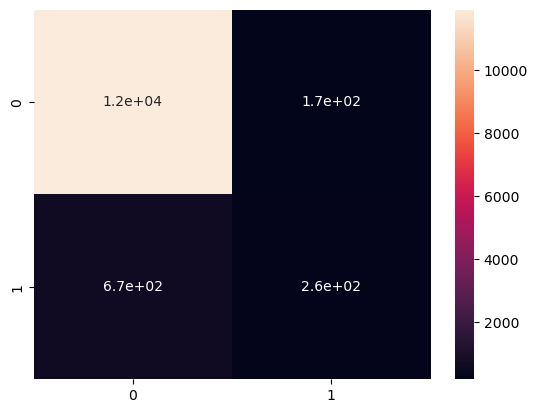

In [292]:
xgb.fit(x_train_scalar,y_train)
y_predict_xg=xgb.predict(x_test_scaler)
y_pred_proba_xg=adaboost.predict_log_proba(x_test_scaler)[::,1]

end=time.time()
time_taken=end-start

confu_mat=confusion_matrix(y_test,y_predict_xg)
print(confu_mat)
sns.heatmap(confu_mat,annot=True)

In [335]:
accu_xg=accuracy_score(y_test,y_predict_xg)
accu_xg

f1_score_xgb=metrics.f1_score(y_test,y_predict_xg)

tpr_xg,fpr_xg,_=roc_curve(y_test,y_pred_proba_xg)
auc_xg=metrics.auc(tpr_xg,fpr_xg)
print(auc_xg)

0.7892534435261708


In [295]:
score=cross_val_score(xgb,df_copy_std,Y,cv=10)

models_res.append(['XGBOOST',accu_xg,auc_xg,f1_score_xgb,time_taken])

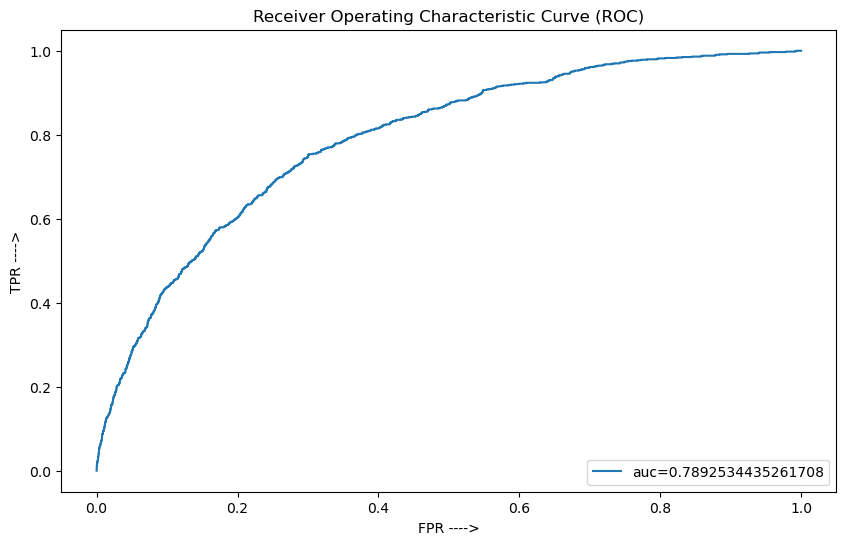

In [338]:
plt.figure(figsize=(10,6))
plt.plot(tpr_xg,fpr_xg,label="auc="+str(auc_xg))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

## KNN

In [296]:
from sklearn.neighbors import KNeighborsClassifier


### WITH DEFAULT VLAUE OF K


In [297]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scalar,y_train)
y_pred_knn=knn.predict(x_test_scaler)

In [298]:
class_report=classification_report(y_test,y_pred_knn)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     12100
           1       0.38      0.19      0.25       930

    accuracy                           0.92     13030
   macro avg       0.66      0.58      0.61     13030
weighted avg       0.90      0.92      0.91     13030



### FINDING THE VALUE OF K

In [300]:
acc_score=[]
start=time.time()

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_copy_std,Y,cv=10)
    acc_score.append(score.mean())

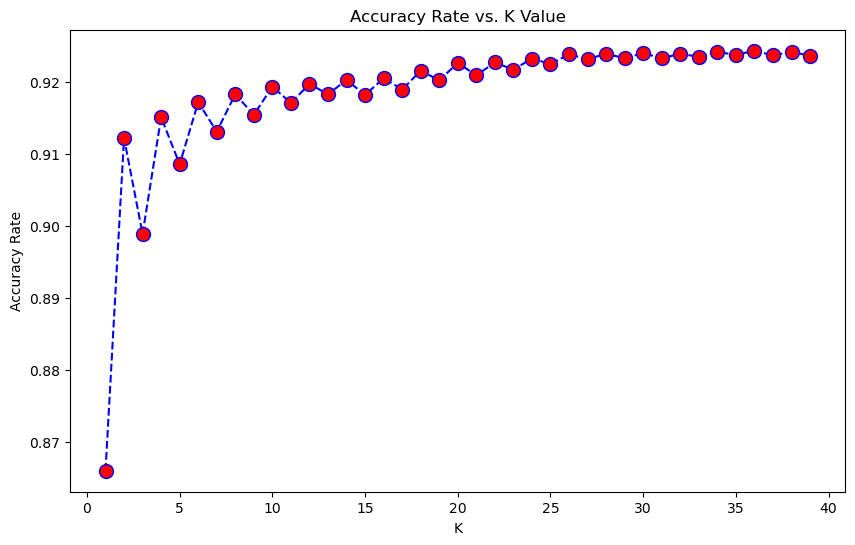

In [301]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc_score,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
# plt.yticks(np.arange(.87,.94,.1))
plt.show()

In [302]:
# error_rate = []

# for i in range(1,40):
    
#     knn = KNeighborsClassifier(n_neighbors=i)
#     score=cross_val_score(knn,df_copy_std,Y,cv=10)
#     error_rate.append(1-score.mean())

In [ ]:
# plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Accuracy Rate')
# # plt.yticks(np.arange(.87,.94,.1))
# plt.show()

In [303]:
# FROM THE ABOVE GRAPH THE OPTIMAL VALUE OF K CAN BE CHOSEN AS 11

# CHECKING THE MODEL FOR Manhattan  DISTANCE

knn=KNeighborsClassifier(n_neighbors=11,p=1)
knn.fit(x_train_scalar,y_train)
y_pred_knn=knn.predict(x_test_scaler)

print(confusion_matrix(y_test,y_pred_knn))

class_report=classification_report(y_test,y_pred_knn)
print(class_report)

end=time.time()
time_taken=end-start

[[12017    83]
 [  824   106]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     12100
           1       0.56      0.11      0.19       930

    accuracy                           0.93     13030
   macro avg       0.75      0.55      0.58     13030
weighted avg       0.91      0.93      0.91     13030



In [304]:
# CHECKING THE MODEL FOR Euclidean DISTANCE
knn=KNeighborsClassifier(n_neighbors=11,p=2)
knn.fit(x_train_scalar,y_train)
y_pred_knn=knn.predict(x_test_scaler)
y_pred_proba_k=knn.predict_proba(x_test_scaler)[::,1]

acc_knn=accuracy_score(y_test,y_pred_knn)
f1_score_knn=metrics.f1_score(y_test,y_pred_knn)

tpr_k,fpr_k,_=roc_curve(y_test,y_pred_proba_k)
auc_k=metrics.auc(tpr_k,fpr_k)

print(confusion_matrix(y_test,y_pred_knn))

class_report=classification_report(y_test,y_pred_knn)
print(class_report)

[[12008    92]
 [  840    90]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     12100
           1       0.49      0.10      0.16       930

    accuracy                           0.93     13030
   macro avg       0.71      0.54      0.56     13030
weighted avg       0.90      0.93      0.91     13030



In [307]:
models_res.append(['KNN',acc_knn,auc_k,f1_score_knn,time_taken])

### Manhattan provides better f1 score with good accuracy

### Summary of all the models performed above

In [339]:
models_summary=pd.DataFrame(models_res,columns=['Algorithm','Accracy','AUC','F1 score','Time Taken(sec)'])

In [340]:
models_summary

,Algorithm,Accracy,AUC,F1 score,Time Taken(sec)
0,Logistic Regression,0.929010,0.789485,0.02734,0.128767
1,Decision Tree,0.929163,0.75825,0.021209,0.089937
2,Random forest,0.933154,0.543632,0.160077,338.111888
3,Adaboost with Decision tree,0.933154,0.830312,0.223015,410.222281
4,Adaboost with logestic regression,0.929163,0.789253,0.027397,410.222281
5,SVM,0.928626,,,2407.722779
6,XGBOOST,0.935533,0.789253,0.380531,496.760564
7,KNN,0.928473,0.775175,0.161871,691.246981


## From the above observation of performance of all models we can observe that Adaboost with Decision Tree performs better with Xgboost as an alternative alogrithm right behind it